# Binary Classification: Deposit Bank - Marketing

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
sys.path.append('../main/')

In [4]:
from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper

In [5]:
df = pd.read_csv('../../datasets/deposit_ml.csv')

In [6]:
df_r = pd.read_csv('../../datasets/deposit_ml_reduced.csv')

In [7]:
X = df.drop(labels='y', axis=1).values
y = df['y'].values

In [8]:
X_r = df_r.drop(labels='y', axis=1).values
y_r = df_r['y'].values

## SVM Binary Classifier (It takes too much time, although the results are quite good)

In [ ]:
from SVMClassificationDSBase import SVMClassificationDSBaseModelParamsToMap
from SVMClassificationDSBase import SVMClassificationDSBaseModel

In [ ]:
params = SVMClassificationDSBaseModelParamsToMap()
svmc = ModelDSBaseWrapper('SVM',X,y,[5,10,15],0.3,SVMClassificationDSBaseModel,params,splitter=train_test_split)

In [ ]:
svmc.train()

In [ ]:
lcsvmc = svmc.getLearningCurves()

In [ ]:
plt.plot(lcsvmc[0,:],'b',lcsvmc[1,:],'r')

In [ ]:
svmc.getScore()

In [ ]:
svmc.save()

In [ ]:
svmc.close()

In [ ]:
recoveredSvmc = SVMClassificationDSBaseModel('SVM2',None,None,None,None,None,None)

In [ ]:
recoveredSvmc.load()

In [ ]:
recoveredSvmc.predict(X[510:515,:])

In [ ]:
y[510:515]

In [ ]:
recoveredSvmc.close()

## Random Forest Classificator

In [23]:
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModel
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModelParamsToMap

In [24]:
params = RandomForestClassificationDSBaseModelParamsToMap(100,15)
rfc = ModelDSBaseWrapper('RF',X,y,[70,75,80,85,90,95,100],0.3,RandomForestClassificationDSBaseModel,params,splitter=train_test_split)

X size:(45211, 52)
y size:(45211,)
initiating model RF0. RandomForestClassification
initiating model RF1. RandomForestClassification
initiating model RF2. RandomForestClassification
initiating model RF3. RandomForestClassification
initiating model RF4. RandomForestClassification
initiating model RF5. RandomForestClassification
initiating model RF6. RandomForestClassification


In [25]:
rfc.train()

training model RF0. RandomForestClassification
training model RF1. RandomForestClassification
training model RF2. RandomForestClassification
training model RF3. RandomForestClassification
training model RF4. RandomForestClassification
training model RF5. RandomForestClassification
training model RF6. RandomForestClassification


In [26]:
lcrfc = rfc.getLearningCurves()

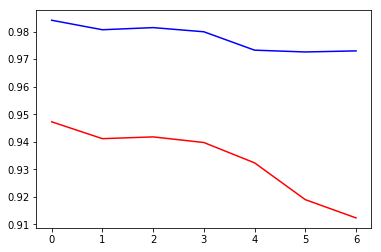

In [27]:
plt.plot(lcrfc[0,:],'b',lcrfc[1,:],'r')

Quite Overfitting!!

In [28]:
rfc.getScore()

0.91234149218519611

In [29]:
rfc.save()

saving model: model_persistance/RandomForestClassification_RF6.sav


In [30]:
rfc.close()

In [31]:
recoveredRfc = RandomForestClassificationDSBaseModel('RF6',None,None,None,None,None,None)

initiating empty model RF6. RandomForestClassification


In [32]:
recoveredRfc.load()

loading model: model_persistance/RandomForestClassification_RF6.sav


In [33]:
recoveredRfc.predict(X[510:515,:])

predicting model RF6. RandomForestClassification


array([0, 0, 0, 0, 0])

In [34]:
y[510:515]

array([0, 0, 1, 0, 0])

In [35]:
print(classification_report(rfc.model.y_test,rfc.predict(rfc.model.X_test)))

predicting model RF6. RandomForestClassification
             precision    recall  f1-score   support

          0       0.93      0.98      0.95     11966
          1       0.71      0.44      0.54      1598

avg / total       0.90      0.91      0.90     13564



In [36]:
print(confusion_matrix(rfc.model.y_test,rfc.predict(rfc.model.X_test)))

predicting model RF6. RandomForestClassification
[[11676   290]
 [  899   699]]


## Ada Boosting Classificator

In [37]:
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModelParamsToMap
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModel

In [38]:
params = AdaBoostClassificationDSBaseModelParamsToMap(100,1.0)
abc = ModelDSBaseWrapper('AB',X,y,[70,75,80,85,90,95,100],0.3,AdaBoostClassificationDSBaseModel,params,splitter=train_test_split)

X size:(45211, 52)
y size:(45211,)
initiating model AB0. AdaBoostClassification
initiating model AB1. AdaBoostClassification
initiating model AB2. AdaBoostClassification
initiating model AB3. AdaBoostClassification
initiating model AB4. AdaBoostClassification
initiating model AB5. AdaBoostClassification
initiating model AB6. AdaBoostClassification


In [39]:
abc.train()

training model AB0. AdaBoostClassification
training model AB1. AdaBoostClassification
training model AB2. AdaBoostClassification
training model AB3. AdaBoostClassification
training model AB4. AdaBoostClassification
training model AB5. AdaBoostClassification
training model AB6. AdaBoostClassification


In [40]:
lcabc = abc.getLearningCurves()

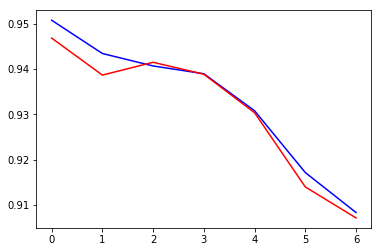

In [41]:
plt.plot(lcabc[0,:],'b',lcabc[1,:],'r')

In [42]:
abc.getScore()

0.90718077263344143

In [43]:
abc.save()

saving model: model_persistance/AdaBoostClassification_AB6.sav


In [44]:
abc.close()

In [45]:
recoveredAbc = AdaBoostClassificationDSBaseModel('AB6',None,None,None,None,None,None)

initiating empty model AB6. AdaBoostClassification


In [46]:
recoveredAbc.load()

loading model: model_persistance/AdaBoostClassification_AB6.sav


In [47]:
recoveredAbc.predict(X[510:515,:])

predicting model AB6. AdaBoostClassification


array([0, 0, 0, 0, 0])

In [48]:
y[510:515]

array([0, 0, 1, 0, 0])

In [49]:
print(classification_report(abc.model.y_test,abc.predict(abc.model.X_test)))

predicting model AB6. AdaBoostClassification
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     11966
          1       0.67      0.42      0.52      1598

avg / total       0.90      0.91      0.90     13564



In [50]:
print(confusion_matrix(abc.model.y_test,abc.predict(abc.model.X_test)))

predicting model AB6. AdaBoostClassification
[[11629   337]
 [  922   676]]


## DNN Classification (Keras)

In [9]:
from DNNClassificationKerasDSBase import DNNClassificationKerasDSBaseParamsToMap
from DNNClassificationKerasDSBase import DNNClassificationKerasDSBaseModel

Using TensorFlow backend.


In [10]:
params = DNNClassificationKerasDSBaseParamsToMap(layers=[40,20,10,5], alpha=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-9, batch_size=64, epochs=150)
dnnkc = ModelDSBaseWrapper('DNNKC',X,y,[70,75,80,85,90,95,100],0.3,DNNClassificationKerasDSBaseModel,params,splitter=train_test_split)

X size:(45211, 52)
y size:(45211,)
initiating model DNNKC0. DNNClassificationKeras


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


initiating model DNNKC1. DNNClassificationKeras
initiating model DNNKC2. DNNClassificationKeras
initiating model DNNKC3. DNNClassificationKeras
initiating model DNNKC4. DNNClassificationKeras
initiating model DNNKC5. DNNClassificationKeras
initiating model DNNKC6. DNNClassificationKeras


In [11]:
dnnkc.train()

Epoch 1/150
22152/22152 [==============================] - 2s 69us/step - loss: 0.2317 - acc: 0.9420
Epoch 2/150
22152/22152 [==============================] - 1s 28us/step - loss: 0.2204 - acc: 0.9420
Epoch 3/150
22152/22152 [==============================] - 1s 28us/step - loss: 0.1538 - acc: 0.9428
Epoch 4/150
22152/22152 [==============================] - 1s 29us/step - loss: 0.1274 - acc: 0.9468
Epoch 5/150
22152/22152 [==============================] - 1s 28us/step - loss: 0.1202 - acc: 0.9476
Epoch 6/150
22152/22152 [==============================] - 1s 29us/step - loss: 0.1179 - acc: 0.9466
Epoch 7/150
22152/22152 [==============================] - 1s 28us/step - loss: 0.1148 - acc: 0.9488
Epoch 8/150
22152/22152 [==============================] - 1s 29us/step - loss: 0.1130 - acc: 0.9498
Epoch 9/150
22152/22152 [==============================] - 1s 29us/step - loss: 0.1126 - acc: 0.9484
Epoch 10/150
22152/22152 [==============================] - 1s 29us/step - loss: 0.1107 - a

23735/23735 [==============================] - 1s 28us/step - loss: 0.1224 - acc: 0.9466
Epoch 11/150
23735/23735 [==============================] - 1s 27us/step - loss: 0.1205 - acc: 0.9465
Epoch 12/150
23735/23735 [==============================] - 1s 27us/step - loss: 0.1203 - acc: 0.9467
Epoch 13/150
23735/23735 [==============================] - 1s 28us/step - loss: 0.1196 - acc: 0.9478
Epoch 14/150
23735/23735 [==============================] - 1s 28us/step - loss: 0.1191 - acc: 0.9472
Epoch 15/150
23735/23735 [==============================] - 1s 28us/step - loss: 0.1172 - acc: 0.9485
Epoch 16/150
23735/23735 [==============================] - 1s 28us/step - loss: 0.1173 - acc: 0.9476
Epoch 17/150
23735/23735 [==============================] - 1s 28us/step - loss: 0.1160 - acc: 0.9497: 0s - loss: 0.1070 - a
Epoch 18/150
23735/23735 [==============================] - 1s 28us/step - loss: 0.1157 - acc: 0.9494
Epoch 19/150
23735/23735 [==============================] - 1s 28us/step

25317/25317 [==============================] - 1s 27us/step - loss: 0.1237 - acc: 0.9454
Epoch 19/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1218 - acc: 0.9453
Epoch 20/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1213 - acc: 0.9459
Epoch 21/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1199 - acc: 0.9465
Epoch 22/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1193 - acc: 0.9473
Epoch 23/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1185 - acc: 0.9476
Epoch 24/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1185 - acc: 0.9477
Epoch 25/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1168 - acc: 0.9479
Epoch 26/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1158 - acc: 0.9492
Epoch 27/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.1138 - acc: 

25317/25317 [==============================] - 1s 28us/step - loss: 0.0852 - acc: 0.9633
Epoch 99/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0850 - acc: 0.9638
Epoch 100/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0851 - acc: 0.9627
Epoch 101/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0867 - acc: 0.9629
Epoch 102/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0852 - acc: 0.9636
Epoch 103/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0834 - acc: 0.9626
Epoch 104/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0848 - acc: 0.9630
Epoch 105/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0844 - acc: 0.9628
Epoch 106/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0838 - acc: 0.9645
Epoch 107/150
25317/25317 [==============================] - 1s 28us/step - loss: 0.0832

26900/26900 [==============================] - 1s 28us/step - loss: 0.1128 - acc: 0.9494
Epoch 29/150
26900/26900 [==============================] - 1s 28us/step - loss: 0.1132 - acc: 0.9501
Epoch 30/150
26900/26900 [==============================] - 1s 29us/step - loss: 0.1121 - acc: 0.9501: 0s - loss: 0.1077 
Epoch 31/150
26900/26900 [==============================] - 1s 28us/step - loss: 0.1107 - acc: 0.9503
Epoch 32/150
26900/26900 [==============================] - 1s 28us/step - loss: 0.1101 - acc: 0.9509
Epoch 33/150
26900/26900 [==============================] - 1s 28us/step - loss: 0.1090 - acc: 0.9508
Epoch 34/150
26900/26900 [==============================] - 1s 29us/step - loss: 0.1083 - acc: 0.9514
Epoch 35/150
26900/26900 [==============================] - 1s 28us/step - loss: 0.1077 - acc: 0.9510
Epoch 36/150
26900/26900 [==============================] - 1s 29us/step - loss: 0.1070 - acc: 0.9522
Epoch 37/150
26900/26900 [==============================] - 1s 28us/step - 

28482/28482 [==============================] - 1s 28us/step - loss: 0.1205 - acc: 0.9463
Epoch 39/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1208 - acc: 0.9455
Epoch 40/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1200 - acc: 0.9478
Epoch 41/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1190 - acc: 0.9478
Epoch 42/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1190 - acc: 0.9475
Epoch 43/150
28482/28482 [==============================] - 1s 29us/step - loss: 0.1181 - acc: 0.9471
Epoch 44/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1175 - acc: 0.9472
Epoch 45/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1180 - acc: 0.9479
Epoch 46/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1170 - acc: 0.9480
Epoch 47/150
28482/28482 [==============================] - 1s 28us/step - loss: 0.1164 - acc: 

30065/30065 [==============================] - 1s 28us/step - loss: 0.1328 - acc: 0.9417
Epoch 49/150
30065/30065 [==============================] - 1s 28us/step - loss: 0.1319 - acc: 0.9425
Epoch 50/150
30065/30065 [==============================] - 1s 28us/step - loss: 0.1304 - acc: 0.9420
Epoch 51/150
30065/30065 [==============================] - 1s 28us/step - loss: 0.1314 - acc: 0.9409
Epoch 52/150
30065/30065 [==============================] - 1s 29us/step - loss: 0.1296 - acc: 0.9431
Epoch 53/150
30065/30065 [==============================] - 1s 29us/step - loss: 0.1286 - acc: 0.9429
Epoch 54/150
30065/30065 [==============================] - 1s 28us/step - loss: 0.1288 - acc: 0.9435
Epoch 55/150
30065/30065 [==============================] - 1s 29us/step - loss: 0.1289 - acc: 0.9430
Epoch 56/150
30065/30065 [==============================] - 1s 29us/step - loss: 0.1275 - acc: 0.9432
Epoch 57/150
30065/30065 [==============================] - 1s 28us/step - loss: 0.1267 - acc: 

31647/31647 [==============================] - 1s 29us/step - loss: 0.1453 - acc: 0.9311
Epoch 58/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1424 - acc: 0.9311
Epoch 59/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1414 - acc: 0.9314
Epoch 60/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1425 - acc: 0.9318
Epoch 61/150
31647/31647 [==============================] - ETA: 0s - loss: 0.1397 - acc: 0.933 - 1s 29us/step - loss: 0.1405 - acc: 0.9329
Epoch 62/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1422 - acc: 0.9336
Epoch 63/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1411 - acc: 0.9330
Epoch 64/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1386 - acc: 0.9340
Epoch 65/150
31647/31647 [==============================] - 1s 29us/step - loss: 0.1388 - acc: 0.9329
Epoch 66/150
31647/31647 [==============================]

In [12]:
lcdnnkc=dnnkc.getLearningCurves()

13564/13564 [==============================] - 0s 13us/step


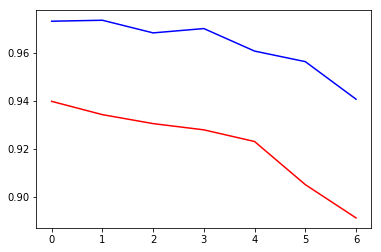

In [13]:
plt.plot(lcdnnkc[0,:],'b',lcdnnkc[1,:],'r')

In [14]:
dnnkc.getScore()

0.8913299911706295

In [15]:
dnnkc.save()

In [16]:
dnnkc.close()

In [17]:
recoveredDnnkc = DNNClassificationKerasDSBaseModel('DNNKC6',None,None,None,None,None,None)

initiating empty model DNNKC6. DNNClassificationKeras


In [18]:
recoveredDnnkc.load()

In [19]:
recoveredDnnkc.predict(X[510:515,:])

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.]])

In [20]:
y[510:515]

array([0, 0, 1, 0, 0])

In [21]:
print(classification_report(dnnkc.model.y_test,dnnkc.predict(dnnkc.model.X_test)))

             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94     11966
        1.0       0.00      0.00      0.00      1598

avg / total       0.78      0.88      0.83     13564



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
print(confusion_matrix(dnnkc.model.y_test,dnnkc.predict(dnnkc.model.X_test)))

[[11966     0]
 [ 1598     0]]


# End of Evaluation! 